In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from scholarly import scholarly

def fetch_publications(scholar_id):
    """
    Fetch publications for a given Google Scholar ID.
    """
    try:
        author = scholarly.search_author_id(scholar_id)
        scholarly.fill(author, sections=['publications'])
        publications = []
        for pub in author.get("publications", []):
            scholarly.fill(pub)
            publications.append({
                "title": pub.get("bib", {}).get("title", ""),
                "citations": pub.get("num_citations", 0),
                "year": pub.get("bib", {}).get("pub_year", ""),
            })
        return publications
    except Exception as e:
        print(f"Error fetching publications for {scholar_id}: {e}")
        return []

In [11]:
def construct_citation_network(professor_data):
    """
    Construct a citation network using publication data.
    """
    G = nx.DiGraph()

    for professor, publications in professor_data.items():
        for pub in publications:
            G.add_node(pub["title"], professor=professor, year=pub["year"])
            # Add edges based on citations (dummy edges for demo)
            # Here you would include real citation relationships if available
            for other_pub in publications:
                if other_pub["title"] != pub["title"]:
                    G.add_edge(pub["title"], other_pub["title"])

    return G

In [12]:
def analyze_network(G):
    """
    Analyze the citation network and compute metrics.
    """
    print("Graph Statistics:")
    print(f"Number of Nodes: {G.number_of_nodes()}")
    print(f"Number of Edges: {G.number_of_edges()}")

    # Compute Degree Centrality
    degree_centrality = nx.degree_centrality(G)
    print("\nDegree Centrality:")
    for node, centrality in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"{node}: {centrality}")

    # Compute Influence (PageRank)
    pagerank = nx.pagerank(G)
    print("\nPageRank (Influence):")
    for node, influence in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"{node}: {influence}")

    # Degree of Connectivity
    print("\nDegree of Connectivity:")
    for node in G.nodes():
        print(f"{node}: {G.degree[node]}")

In [13]:
def visualize_network(G, output_file="citation_network.png"):
    """
    Visualize the citation network.
    """
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    colors = ["red" if G.nodes[node].get("professor") == "Professor 1" else "blue" for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=500, font_size=8, font_weight='bold')
    plt.title("Citation Network (IIT + NIT Professors)")
    plt.savefig(output_file)
    plt.show()

In [14]:
professor_data = {
    "Professor 1 (IIT)": fetch_publications("Sk-JV9QAAAAJ"),
    "Professor 2 (NIT)": fetch_publications("5MD_e_wAAAAJ")
}

In [15]:
# Construct and Analyze Citation Network
citation_graph = construct_citation_network(professor_data)
analyze_network(citation_graph)

Graph Statistics:
Number of Nodes: 188
Number of Edges: 19662

Degree Centrality:
Detection of phishing websites using an efficient feature-based machine learning framework: 1.3475935828877004
CatchPhish: detection of phishing websites by inspecting URLs: 1.3475935828877004
Efficient deep learning techniques for the detection of phishing websites: 1.3475935828877004
Jail-Phish: An improved search engine based phishing detection system: 1.3475935828877004
Detecting phishing websites using automation of human behavior: 1.3475935828877004

PageRank (Influence):
Finding the bias and prestige of nodes in networks based on trust scores: 0.005319148936170216
HD-Index: Pushing the Scalability-Accuracy Boundary for Approximate kNN Search in High-Dimensional Spaces: 0.005319148936170216
A continuous query system for dynamic route planning: 0.005319148936170216
Minimally infrequent itemset mining using pattern-growth paradigm and residual trees: 0.005319148936170216
FTDP-17 mutations in Tau alter

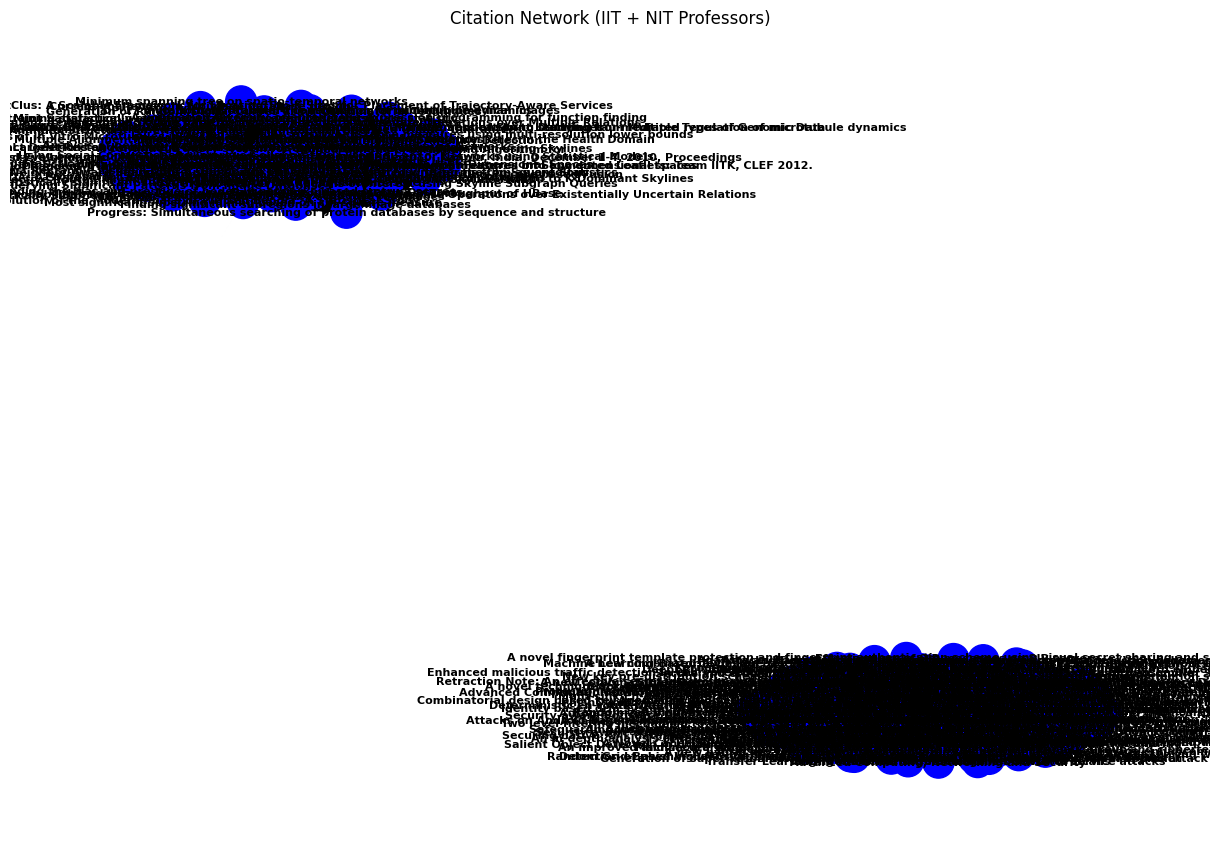

In [16]:
# Visualize the Network
visualize_network(citation_graph)